<a href="https://colab.research.google.com/github/colgate116/T_rex_game/blob/master/CompVision_Shark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Модель YOLO с тренировкой на своих файла

Загрузка, парсинг данных и обучение

In [2]:
from IPython.display import clear_output

In [3]:
!nvidia-smi
!pip install ultralytics

clear_output()

In [4]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)
%cd yolov5
clear_output()

In [5]:
import glob
import torch
from IPython.display import display, Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import numpy as np
import io
import cv2
import zipfile
from moviepy.editor import *
from tqdm import tqdm_notebook
from base64 import b64encode

Загружаем zip.архив

In [ ]:
HOME = "/content"

#имя архива
dataSet_name = "Thailand.zip"

In [ ]:
zip_file = f"/{HOME}/{dataSet_name}"
output = f"/{HOME}"

with zipfile.ZipFile(zip_file,'r') as zip_ref:
  zip_ref.extractall(output)

In [ ]:
img_path = f"/{output}/train/images/"
lbl_path = f"/{output}/train/labels/"
img_name = os.listdir(img_path)
lbl_name = os.listdir(lbl_path)

In [ ]:
labels = []
for i in range(len(lbl_name)):
  with open (lbl_path+lbl_name[i]) as file:
    temp = file.read()
    labels.append(temp)

#Назначить классы
classes = ["Boat","Person"]

In [ ]:
img_path = "/train/images"

In [ ]:
yaml_file = f"train: ..{img_path}\nval: ..{img_path}\n\nnames:\n 0: '{classes[0]}' \n 1: '{classes[1]}'"
with open("//content/data.yaml", "w") as f:
  f.write(yaml_file)
%cat /content/data.yaml

train: ../train/images
val: ../train/images

names:
 0: 'Boat' 
 1: 'Person'

In [ ]:
yaml_path = '/content/data.yaml'

##Модель yolov8


In [ ]:
%cd {HOME}

!yolo task=detect mode=train data={yaml_path} model='yolov8m' epochs=300 conf=0.25 imgsz=640 plots=True

/content
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m, data=/content/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.2, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

###Проверка модели

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train8/weights/best.pt data={yaml_path}

/content
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/train/labels.cache... 97 images, 2 backgrounds, 0 corrupt: 100% 97/97 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:06<00:00,  1.02it/s]
                   all         97        195      0.992      0.967      0.982      0.887
                  Boat         97        100      0.989      0.934       0.97      0.801
                Person         97         95      0.995          1      0.995      0.972
Speed: 1.6ms preprocess, 15.3ms inference, 0.1ms loss, 23.9ms postprocess per image
Results saved to runs/detect/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train8/weights/best.pt source={HOME}/{img_path} save=True

/content
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/97 /content/train/images/1_png.rf.86cb38d3e8f472c1c61ce191ba4d6d6f.jpg: 384x640 1 Person, 105.6ms
image 2/97 /content/train/images/2_png.rf.341766d5c0a44cf6821391ace5de592f.jpg: 384x640 1 Person, 25.1ms
image 3/97 /content/train/images/3_png.rf.b486105402d8ea936c99bcdbcc03b661.jpg: 384x640 1 Person, 25.1ms
image 4/97 /content/train/images/vlcsnap-2024-05-16-17h10m23s331_png.rf.69ffd43c6b8cd37511aee4dc2532c5ab.jpg: 384x640 1 Person, 25.1ms
image 5/97 /content/train/images/vlcsnap-2024-05-16-17h10m33s266_png.rf.b217c0650afced498f0e5821c11f9c80.jpg: 384x640 1 Person, 25.2ms
image 6/97 /content/train/images/vlcsnap-2024-05-16-17h10m41s159_png.rf.3d2ed9ac87b5fef6a64c89e838d4c6f7.jpg: 384x640 3 Persons, 20.3ms
image 7/97 /content/train/images/vlcsnap-2024-05-16-17h10m46s284_png.rf.e4a0b1fde67f7600c43de3aa7cdc

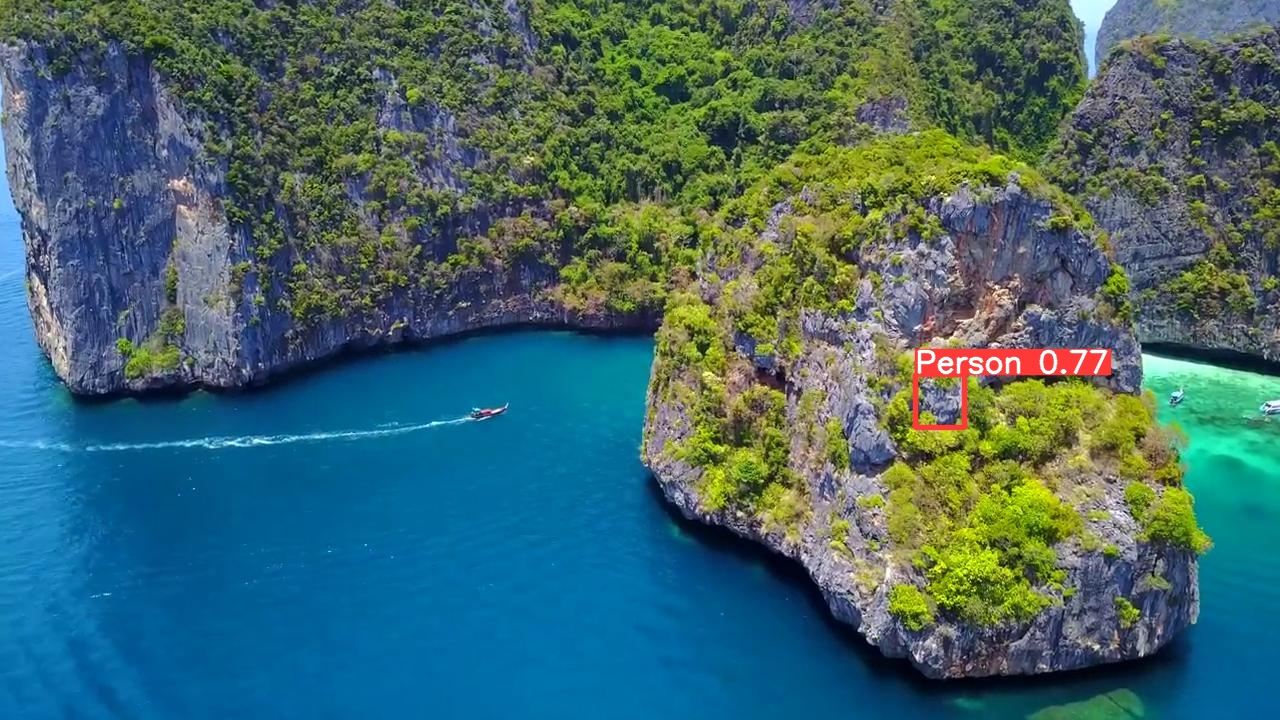

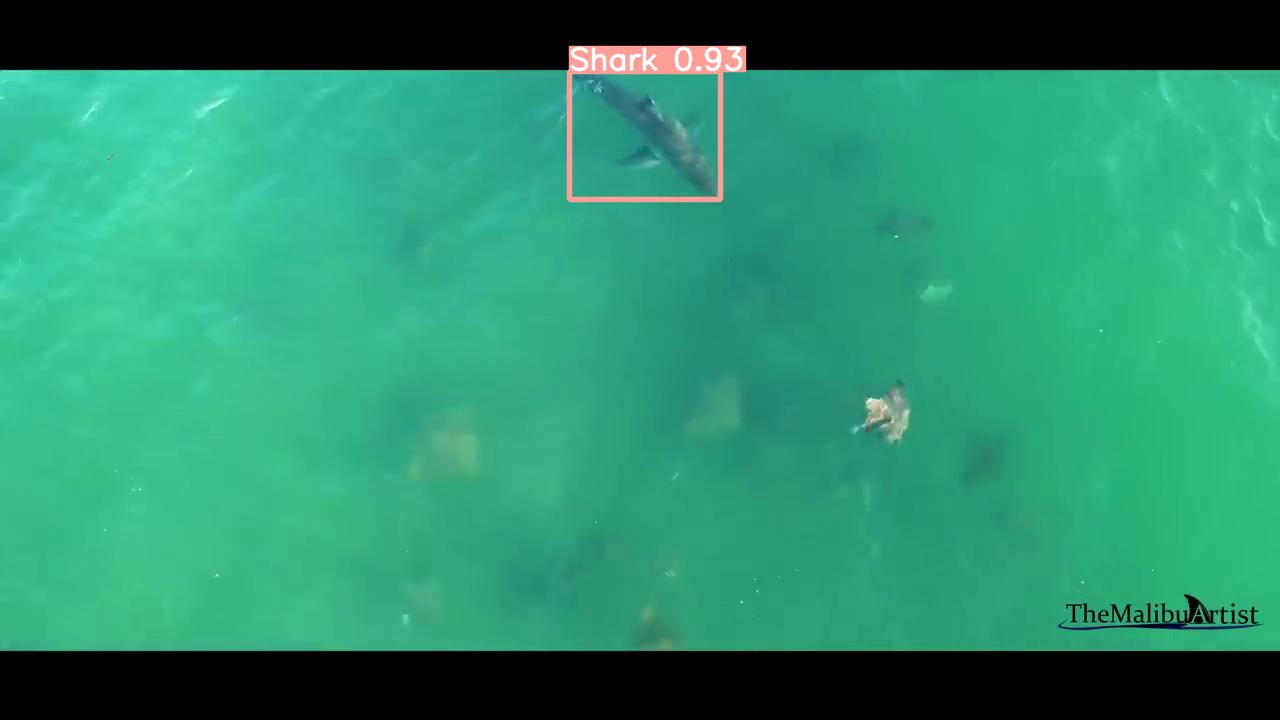

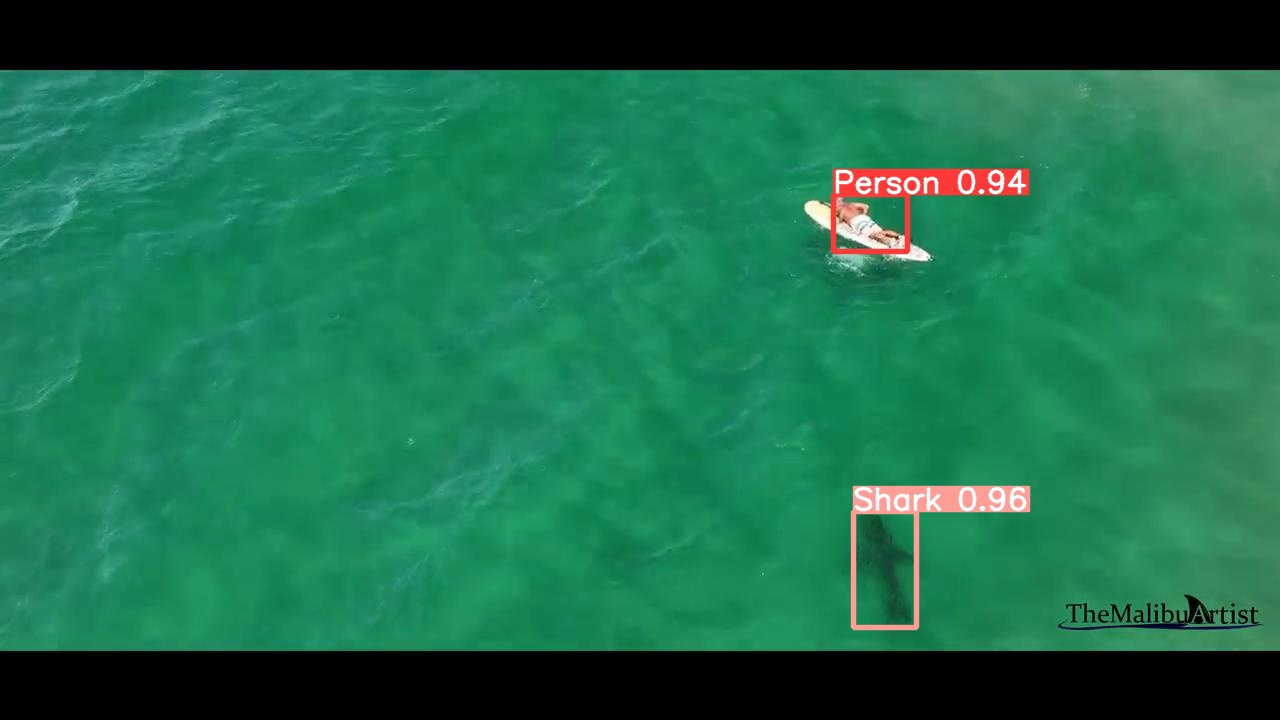

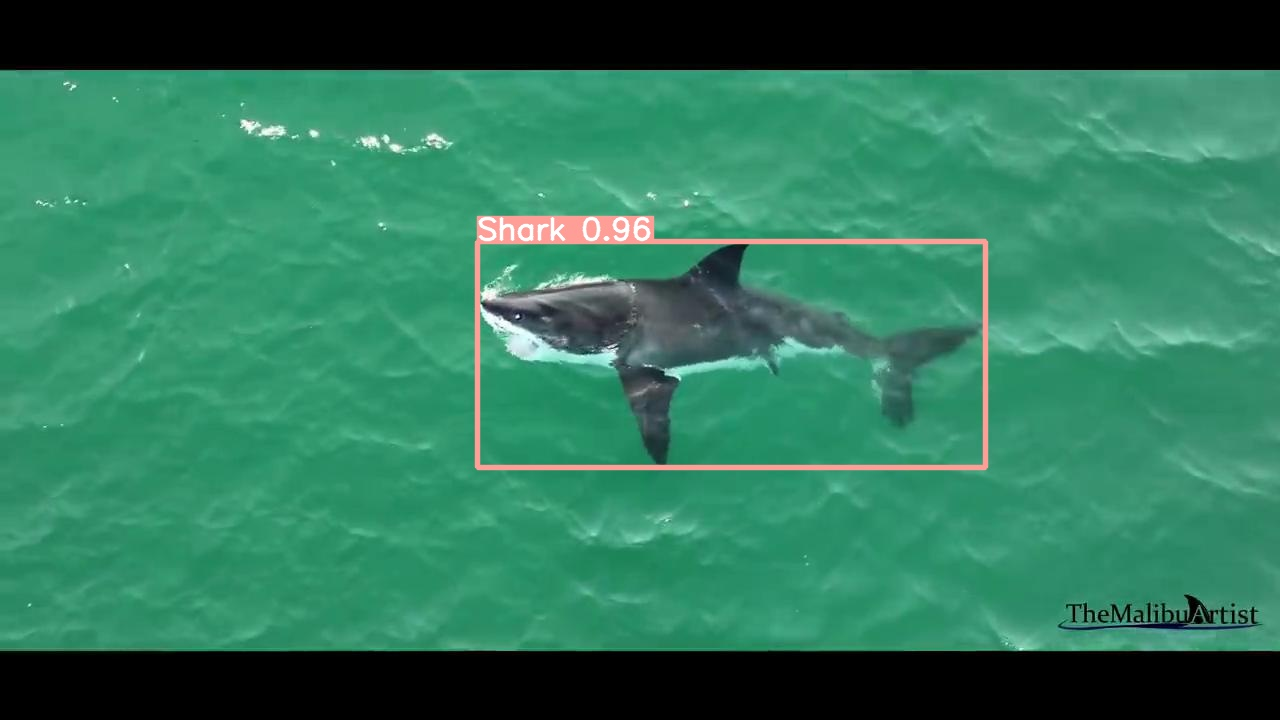

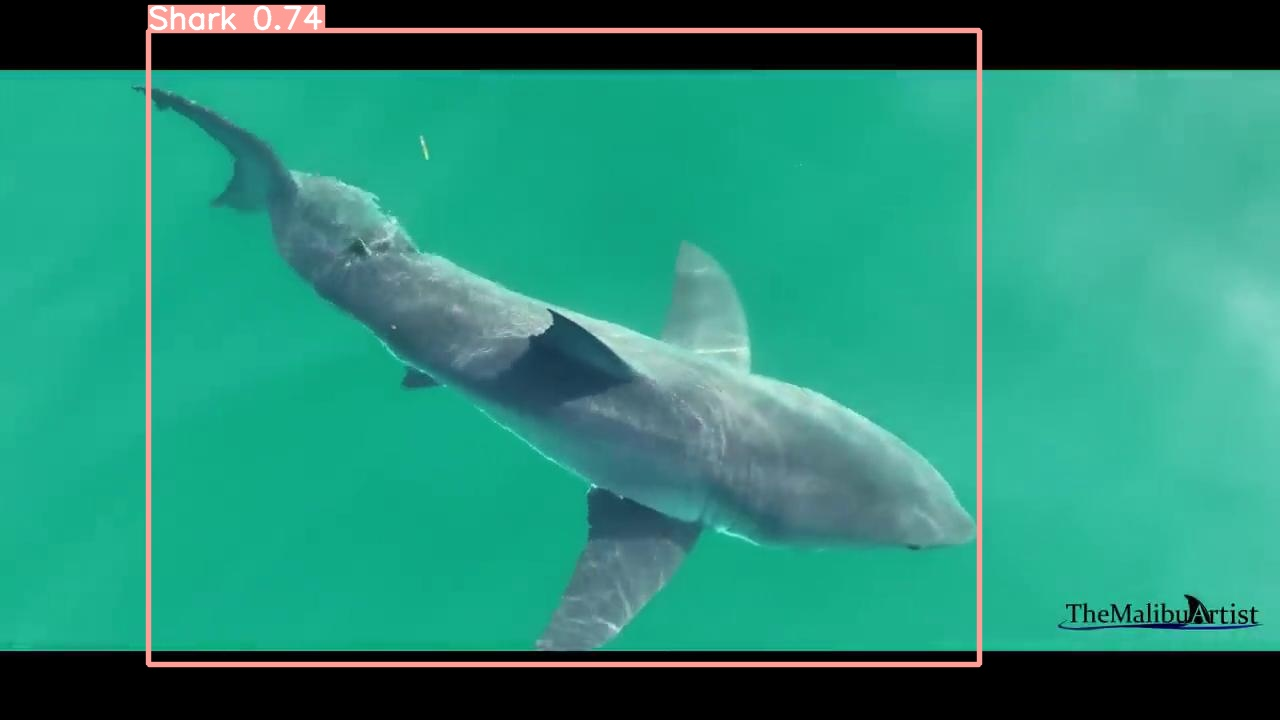

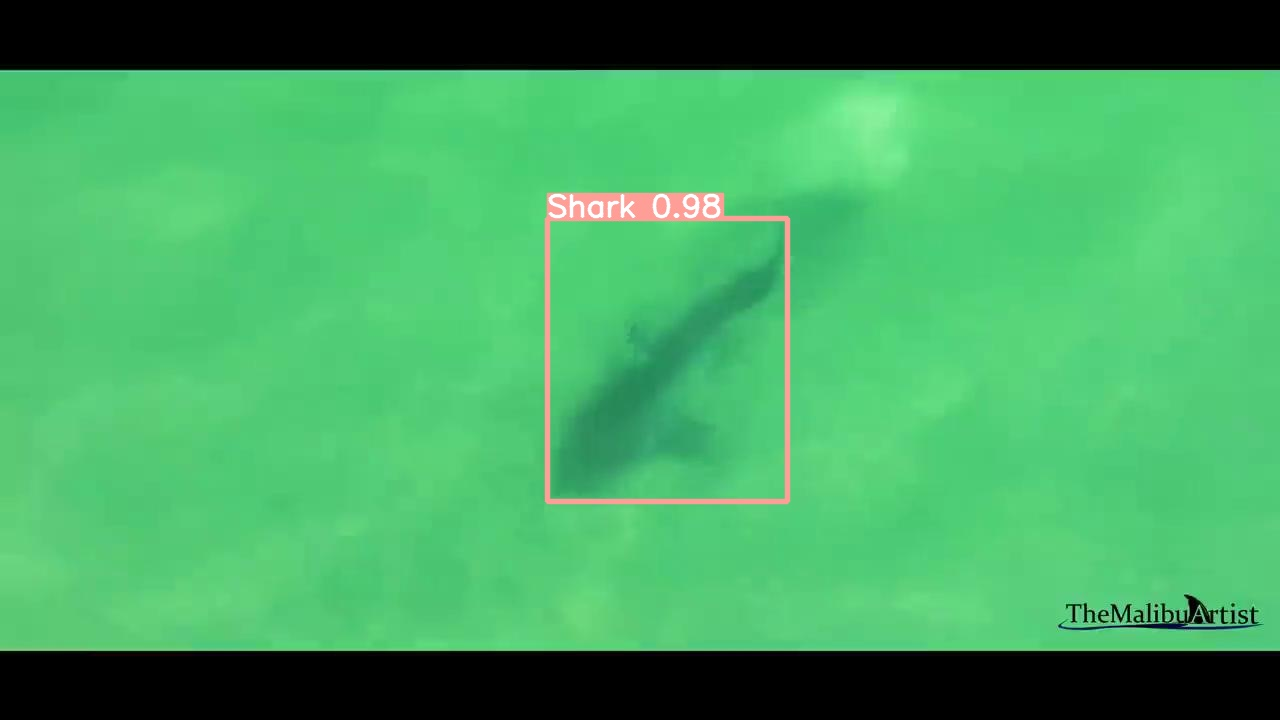

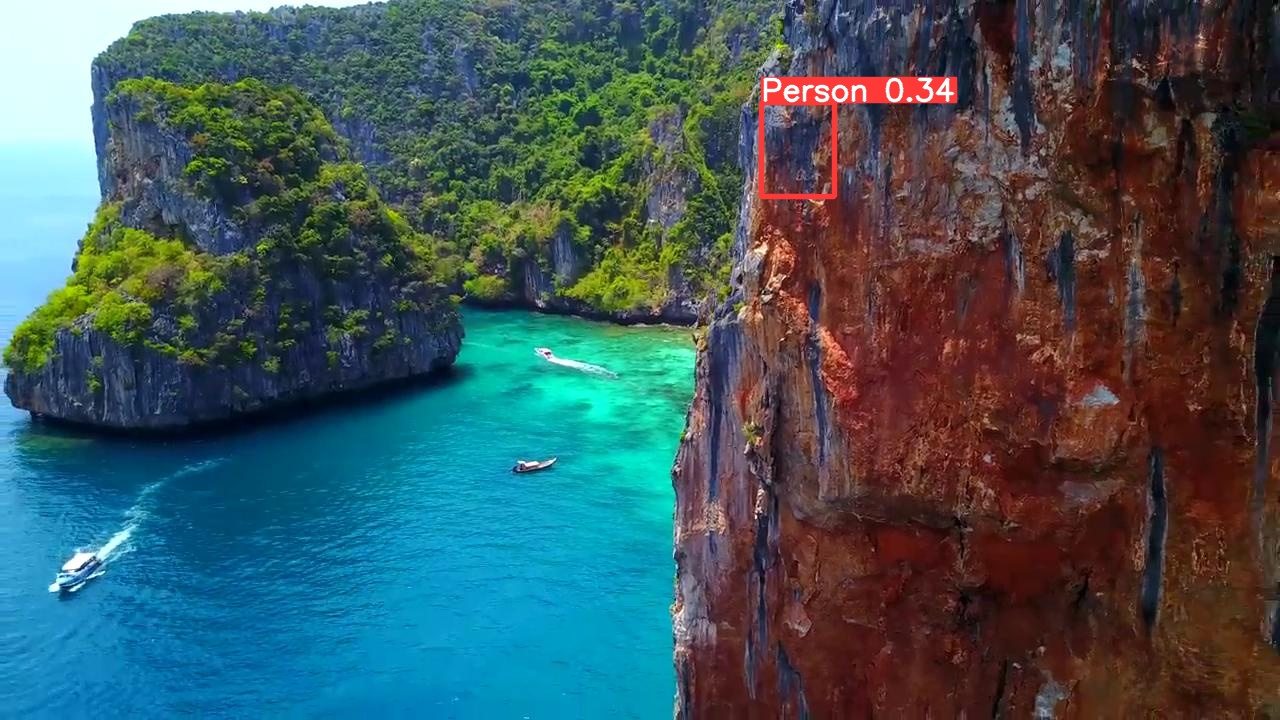

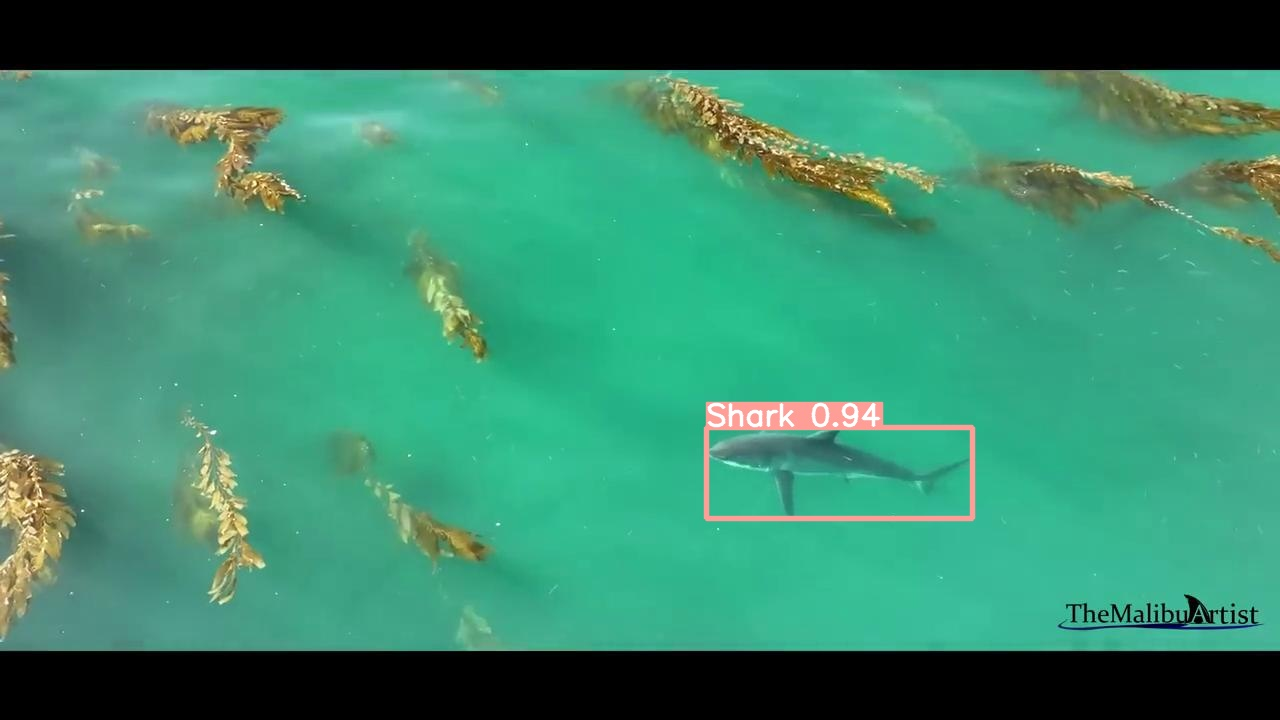

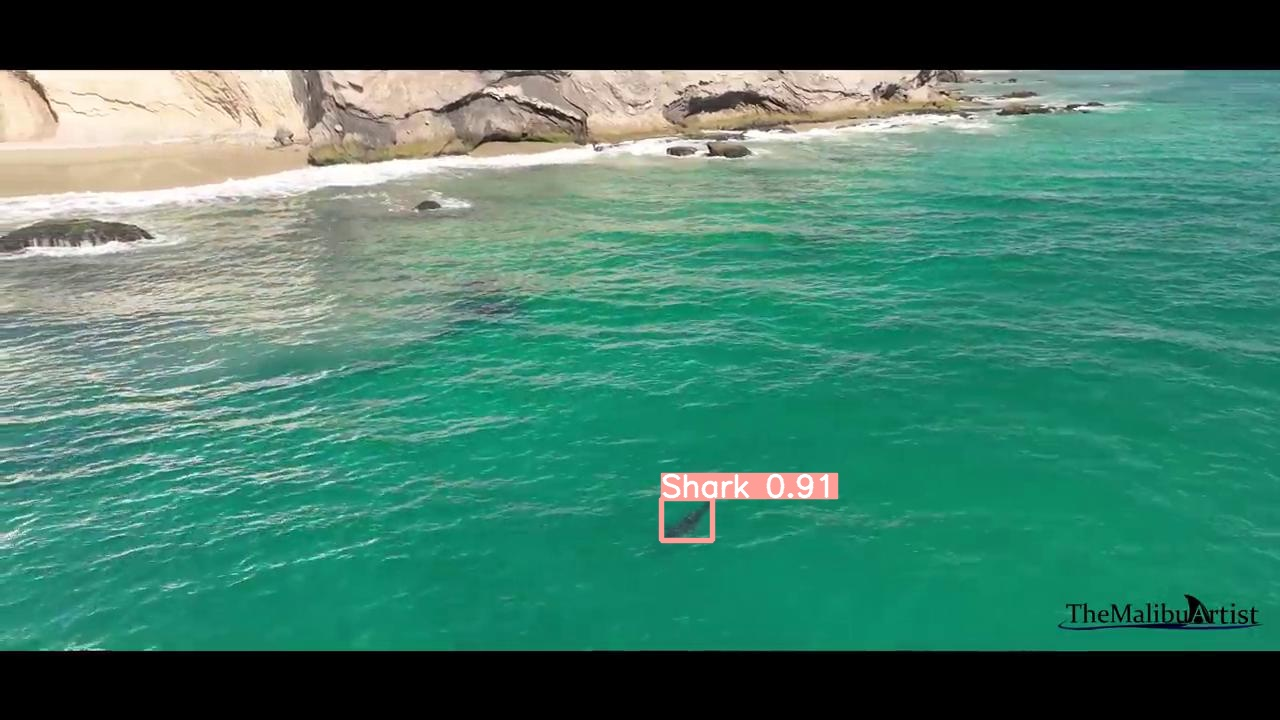

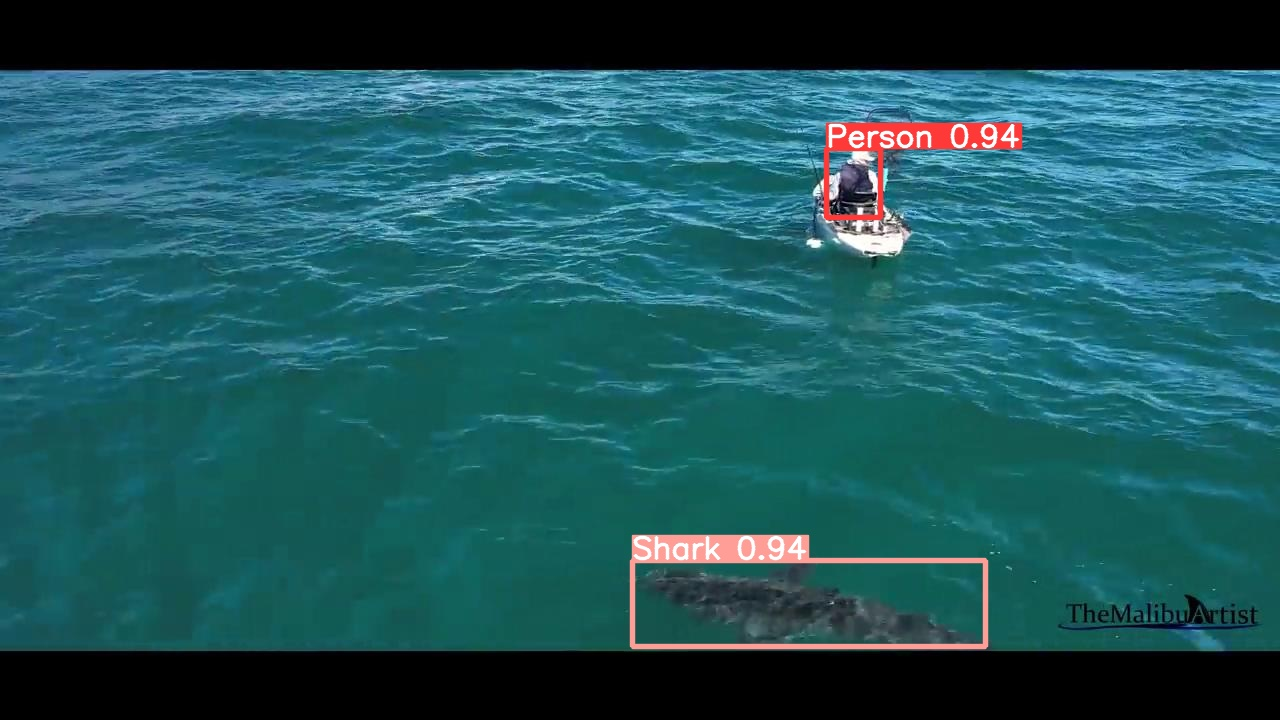

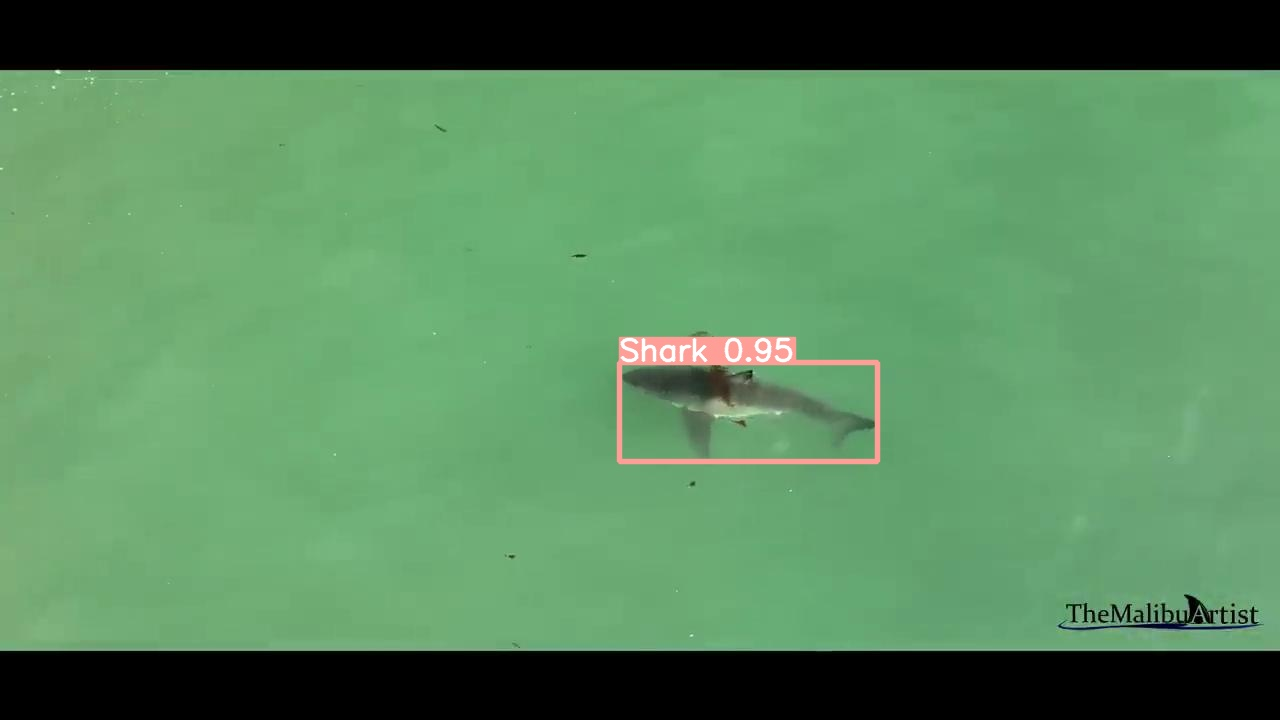

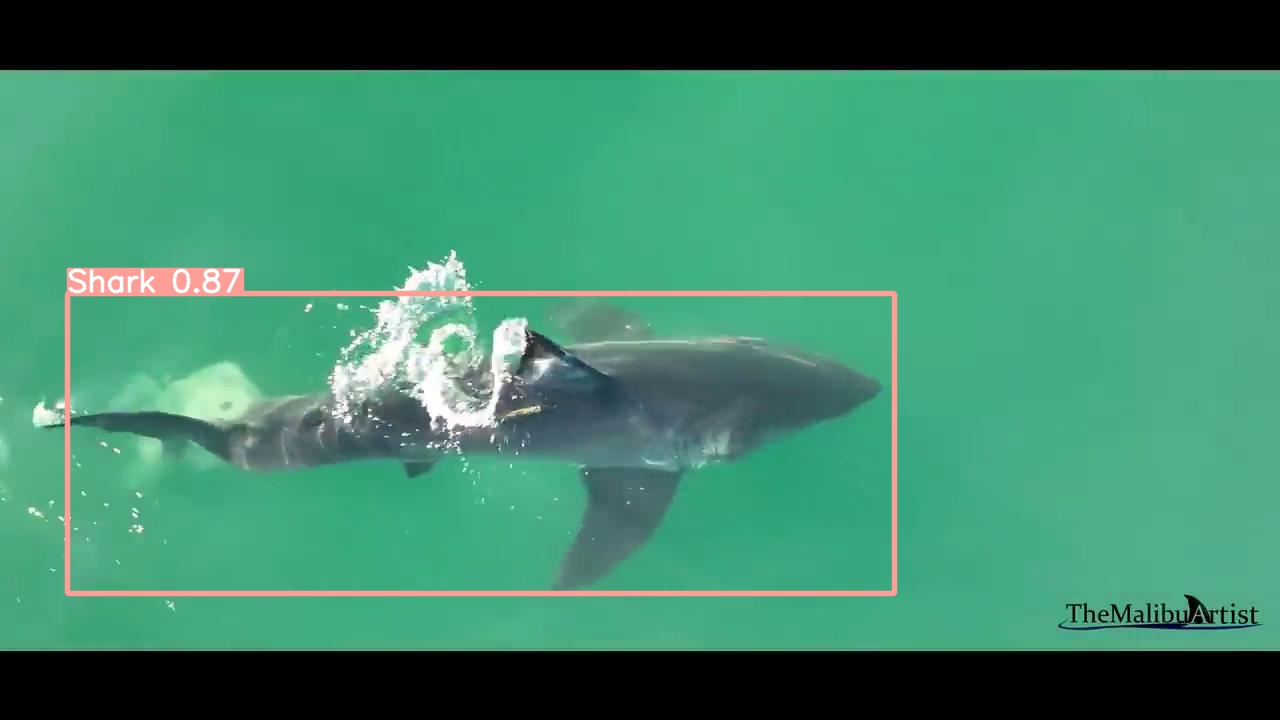

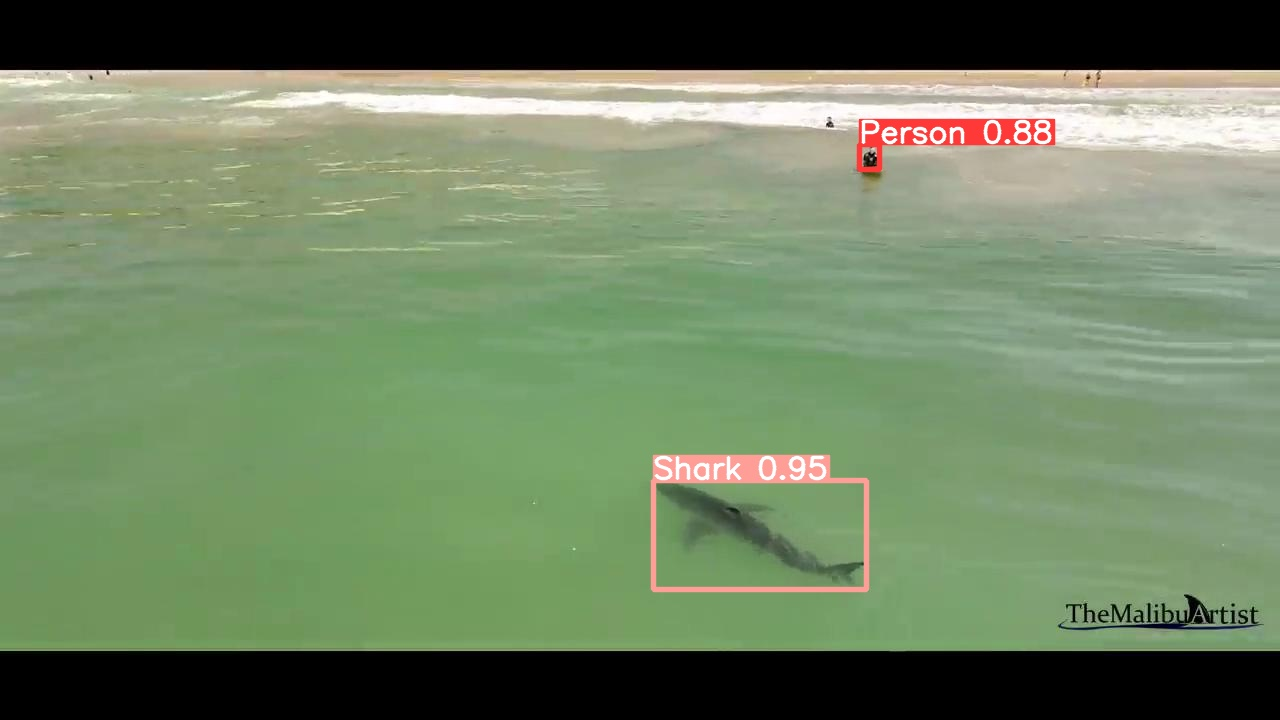

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:13]:
    display(Image(filename=image_path, width=640))
    print("\n")

##Модель yolov5

Добавить гиперпараметры

In [ ]:
%cd /content/yolov5/
!python train.py --img 1280 --batch 8 --epochs 500 --data '../data.yaml' --weights 'yolov5m6.pt' --name yolov5x_results --hyp '/content/hyp_evolve.yaml'

/content/yolov5
2024-05-22 19:54:05.802903: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 19:54:05.802954: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 19:54:05.804338: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m6.pt, cfg=, data=../data.yaml, hyp=/content/hyp_evolve.yaml, epochs=500, batch_size=8, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_c

###Проверка модели

#Обработка видео с использованием созданной модели

In [7]:
!pip install cvzone

clear_output()

In [8]:
from ultralytics import YOLO
import cvzone
from enum import Enum

In [9]:
class Color(Enum):
    # brg
    BLUE = (190, 0, 0)
    RED = (0, 0, 180)
    PURPLE = (180, 0, 180)
    YELLOW = (0, 180, 180)
    GREEN = (0, 180, 0)
    ORANGE = (0, 150, 180)

In [47]:
# Отрисовка рамки
def bounding_box(img, cordinates, class_id):
    """
    :param img:
    :param coordinates: (x1, y1, x2, y2)
    :param class_id: id of detected class
    :return:
    """
    # С масштабированием под разные разрешения
    x1, y1, x2, y2 = cordinates
    w0 = 640
    w, h = x2 - x1, y2 - y1
    h1, w1, c = img.shape
    k = w1 / w0
    class_name = classes[class_id]
    colors = [color.value for color in Color]
    class_color = colors[class_id]
    cvzone.cornerRect(img, (x1, y1, w, h), l=int(min(w, h) * 0.25), t=int(k), rt=0,
                      colorC=class_color)
    cvzone.putTextRect(img, f"{class_name}", (x1, y1 - h1 // 144 - h1//360), scale=k/2, thickness=int(k-1), offset=0,
                       font=cv2.FONT_HERSHEY_DUPLEX, border=h1//360, colorB=class_color, colorR=class_color)

Выбираем модель

In [18]:
model_path = "/content/best.pt"

#YoloV5
model = torch.hub.load("/content/yolov5", "custom", path=model_path, source="local")

#YoloV8
#model = YOLO(model_path)

classes = model.names

YOLOv5 🚀 v7.0-313-g712de55a Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
Model summary: 276 layers, 35254692 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


Загрузить видео

In [20]:
media_path = r"/content/Thailand.mp4"
media = cv2.VideoCapture(media_path)
frame_width = int(media.get(3))
frame_height = int(media.get(4))

Указать название нового видео

In [71]:
new_video_name = "Boat detection 2.mp4"

In [72]:
output_media = cv2.VideoWriter(new_video_name, cv2.VideoWriter_fourcc(*'mp4v'), 30, (frame_width, frame_height))

##Для моделей V5

In [ ]:
while media.isOpened():
    success, img = media.read()

    if not success:
        break

    res = model(img)
    for r in res.pred[0]:
      x1, y1, x2, y2 = map(int, r[: 4])
      coordinates = (x1,y1,x2,y2)
      class_id = int(r[-1])
      bounding_box(img, coordinates, class_id)
    output_media.write(img)

media.release()
output_media.release()

##Для моделей v8

In [73]:
while media.isOpened():
    success, img = media.read()

    if not success:
        break

    res = model(img, stream = True)
    for r in res:
        boxes = r.boxes
        for box in boxes:
            coordinates = map(int, box.xyxy[0])
            class_id = int(box.cls[0])
            bounding_box(img, coordinates, class_id)

    #img = cv2.resize(img, (1280, 720))
    output_media.write(img)
    #cv2.imshow("Image", img)
    #cv2.waitKey(1)
media.release()
output_media.release()
#cv2.destroyWindow()

image 1/1: 720x1280 (no detections)
Speed: 2.5ms pre-process, 17.8ms inference, 4.6ms NMS per image at shape (1, 3, 384, 640)


TypeError: 'Detections' object is not iterable